# SOCCERDATA

In [2]:
import soccerdata as sd
sd.FBref.available_leagues()

['Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championships',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

## Club Elo

- http://clubelo.com/
- The Elo rating system is a method for calculating the relative skill levels of players in two-player games such as chess and Go.
- 633 clubs up from 1938 to now.

In [3]:
elo = sd.ClubElo()
print(elo.__doc__)

[06/03/24 11:40:32] INFO     Saving cached data to C:\Users\jdelavande\soccerdata\data\ClubElo        ]8;id=368094;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=396654;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py#92\92]8;;\

Provides pd.DataFrames from CSV API at http://api.clubelo.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/ClubElo``.

    Since the source does not provide league names, this class will not filter
    by league. League names will be inserted from the other sources where
    available. Leagues that are only covered by clubelo.com will have NaN
    values.

    Parameters
    ----------
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
                      'https': 'http://10.10.1.10:1080',
                  }

            - list(

In [5]:
current_elo = elo.read_by_date()
current_elo

,rank,country,level,elo,from,to,league
team,,,,,,,
Man City,1.0,ENG,1,2050.554443,2024-05-20,2024-06-03,ENG-Premier League
Real Madrid,2.0,ESP,1,1997.407104,2024-06-02,2024-06-03,ESP-La Liga
Inter,3.0,ITA,1,1964.768433,2024-05-30,2024-06-03,ITA-Serie A
Arsenal,4.0,ENG,1,1946.879395,2024-05-23,2024-06-03,ENG-Premier League
Leverkusen,5.0,GER,1,1925.011719,2024-06-02,2024-06-03,GER-Bundesliga
...,...,...,...,...,...,...,...
FCB Magpies,NaN,GIB,0,859.541016,2024-01-01,2024-06-03,NaN
Atletic Club Escaldes,NaN,AND,0,845.504822,2024-01-01,2024-06-03,NaN
Cosmos,NaN,SMR,0,696.818665,2024-01-01,2024-06-03,NaN


In [6]:
barca_elo = elo.read_team_history("Barcelona")
barca_elo.head()

,rank,team,country,level,elo,to
from,,,,,,
1939-10-22,NaN,Barcelona,ESP,1,1636.704590,1939-12-03
1939-12-04,NaN,Barcelona,ESP,1,1626.102173,1939-12-10
1939-12-11,NaN,Barcelona,ESP,1,1636.728271,1939-12-17
1939-12-18,NaN,Barcelona,ESP,1,1646.951660,1939-12-24
1939-12-25,NaN,Barcelona,ESP,1,1637.424316,1939-12-31


In [15]:
current_elo.index

Index(['Man City', 'Real Madrid', 'Inter', 'Arsenal', 'Leverkusen',
       'Liverpool', 'Bayern', 'Atalanta', 'Barcelona', 'Paris SG',
       ...
       'Penybont', 'Lincoln', 'College Europa', 'Santa Coloma', 'Escaldes',
       'FCB Magpies', 'Atletic Club Escaldes', 'Cosmos', 'Tre Penne',
       'La Fiorita'],
      dtype='object', name='team', length=633)

In [22]:
paris_elo = elo.read_team_history("Paris SG")
real_elo = elo.read_team_history("Real Madrid")
bayern_elo = elo.read_team_history("Bayern")
manu_elo = elo.read_team_history("Man United")

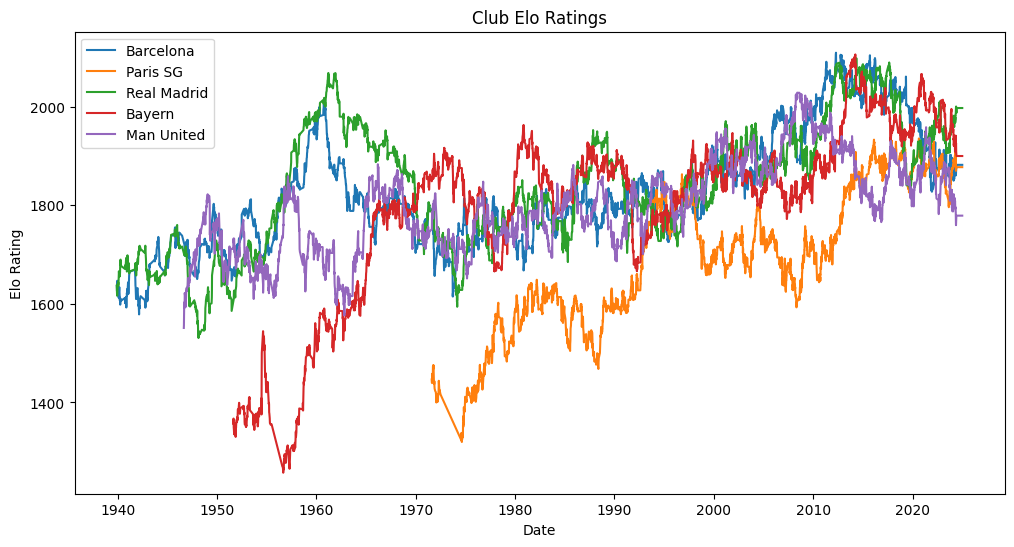

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(barca_elo["to"], barca_elo["elo"])
ax.plot(paris_elo["to"], paris_elo["elo"])
ax.plot(real_elo["to"], real_elo["elo"])
ax.plot(bayern_elo["to"], bayern_elo["elo"])
ax.plot(manu_elo["to"], manu_elo["elo"])
ax.set_title("Club Elo Ratings")
ax.set_xlabel("Date")
ax.set_ylabel("Elo Rating")
ax.legend(["Barcelona", "Paris SG", "Real Madrid", "Bayern", "Man United"])
plt.show()

## ESPN

- https://www.espn.com/
- ESPN is an American multinational basic cable sports channel owned by ESPN Inc.
- ESPN provides up-to-the-minute sports news coverage, scores, highlights and commentary for NFL, MLB, NBA, College Football, NCAA Basketball and more.
- Reagarding the data available, it is possible to get the following information:
    - schedule
    - stats by team (for a given match id)
    - stats by player - Line up (for a given match id)

In [27]:
espn = sd.ESPN()
print(espn.__doc__)

[06/03/24 12:02:41] INFO     Saving cached data to C:\Users\jdelavande\soccerdata\data\ESPN           ]8;id=762766;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=185691;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py#92\92]8;;\

                    INFO     No seasons provided. Will retrieve data for the last 5 seasons.         ]8;id=831457;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=618088;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py#291\291]8;;\

Provides pd.DataFrames from JSON api available at http://site.api.espn.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/ESPN``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include.
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
                      'https': 'http://10.10.1.10:1080',
                  }

            - l

### Game schedule

In [28]:
epl_schedule = espn.read_schedule()
epl_schedule.head()

[06/03/24 12:02:58] ERROR    Error while scraping                                                    ]8;id=515314;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=346692;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py#361\361]8;;\
                             http://site.api.espn.com/apis/site/v2/sports/soccer/eng.1/scoreboard?da               
                             tes=20230701. Retrying... (attempt 1 of 5).                                           
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\connection.py", line 198, in _new_conn                                           
                                 sock = connection.create_connection(                                              
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\util\connection.py", line 60, in create_connection                               
                                 for res in socket.getaddrinfo(host, port, family,                                 
                             socket.SOCK_STREAM):                                                                  
                               File                                                                                
                             "C:\Users\jdelavande\AppData\Local\Programs\Python\Python310\lib\socket               
                             .py", line 955, in getaddrinfo                                                        
                                 for res in _socket.getaddrinfo(host, port, family, type, proto,                   
                             flags):                                                                               
                             socket.gaierror: [Errno 11001] getaddrinfo failed                                     
                                                                                                                   
                             The above exception was the direct cause of the following exception:                  
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\connectionpool.py", line 793, in urlopen                                         
                                 response = self._make_request(                                                    
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\connectionpool.py", line 496, in _make_request                                   
                                 conn.request(                                                                     
                               File                                                                                
                             "c:\Users\jdelavand

date  \
league             season game                                                                      
ENG-Premier League 1819   2018-08-10 Manchester United-Leicester City   2018-08-10 19:00:00+00:00   
                          2018-08-11 AFC Bournemouth-Cardiff City       2018-08-11 14:00:00+00:00   
                          2018-08-11 Fulham-Crystal Palace              2018-08-11 14:00:00+00:00   
                          2018-08-11 Huddersfield Town-Chelsea          2018-08-11 14:00:00+00:00   
                          2018-08-11 Newcastle United-Tottenham Hotspur 2018-08-11 11:30:00+00:00   

                                                                                 home_team  \
league             season game                                                               
ENG-Premier League 1819   2018-08-10 Manchester United-Leicester City    Manchester United   
                          2018-08-11 AFC Bournemouth-Cardiff City          AFC Bournemouth   
                          2018-08-11 Fulham-Crystal Palace                          Fulham   
                          2018-08-11 Huddersfield Town-Chelsea           Huddersfield Town   
                          2018-08-11 Newcastle United-Tottenham Hotspur   Newcastle United   

                                                                                 away_team  \
league             season game                                                               
ENG-Premier League 1819   2018-08-10 Manchester United-Leicester City       Leicester City   
                          2018-08-11 AFC Bournemouth-Cardiff City             Cardiff City   
                          2018-08-11 Fulham-Crystal Palace                  Crystal Palace   
                          2018-08-11 Huddersfield Town-Chelsea                     Chelsea   
                          2018-08-11 Newcastle United-Tottenham Hotspur  Tottenham Hotspur   

                                                                         game_id  \
league             season game                                                     
ENG-Premier League 1819   2018-08-10 Manchester United-Leicester City     513836   
                          2018-08-11 AFC Bournemouth-Cardiff City         513832   
                          2018-08-11 Fulham-Crystal Palace                513834   
                          2018-08-11 Huddersfield Town-Chelsea            513833   
                          2018-08-11 Newcastle United-Tottenham Hotspur   513838   

                                                                        league_id  
league             season game                                                     
ENG-Premier League 1819   2018-08-10 Manchester United-Leicester City       eng.1  
                          2018-08-11 AFC Bournemouth-Cardiff City           eng.1  
                          2018-08-11 Fulham-Crystal Palace                  eng.1  
                          2018-08-11 Huddersfield Town-Chelsea              eng.1  
                          2018-08-11 Newcastle United-Tottenham Hotspur     eng.1

In [32]:
epl_schedule

date  \
league             season game                                                                      
ENG-Premier League 1819   2018-08-10 Manchester United-Leicester City   2018-08-10 19:00:00+00:00   
                          2018-08-11 AFC Bournemouth-Cardiff City       2018-08-11 14:00:00+00:00   
                          2018-08-11 Fulham-Crystal Palace              2018-08-11 14:00:00+00:00   
                          2018-08-11 Huddersfield Town-Chelsea          2018-08-11 14:00:00+00:00   
                          2018-08-11 Newcastle United-Tottenham Hotspur 2018-08-11 11:30:00+00:00   
...                                                                                           ...   
ITA-Serie A        2324   2024-05-26 Frosinone-Udinese                  2024-05-26 18:45:00+00:00   
                          2024-05-26 Hellas Verona-Internazionale       2024-05-26 18:45:00+00:00   
                          2024-05-26 Lazio-Sassuolo                     2024-05-26 18:45:00+00:00   
                          2024-05-26 Napoli-Lecce                       2024-05-26 16:00:00+00:00   
                          2024-06-02 Atalanta-Fiorentina                2024-06-02 16:00:00+00:00   

                                                                                 home_team  \
league             season game                                                               
ENG-Premier League 1819   2018-08-10 Manchester United-Leicester City    Manchester United   
                          2018-08-11 AFC Bournemouth-Cardiff City          AFC Bournemouth   
                          2018-08-11 Fulham-Crystal Palace                          Fulham   
                          2018-08-11 Huddersfield Town-Chelsea           Huddersfield Town   
                          2018-08-11 Newcastle United-Tottenham Hotspur   Newcastle United   
...                                                                                    ...   
ITA-Serie A        2324   2024-05-26 Frosinone-Udinese                           Frosinone   
                          2024-05-26 Hellas Verona-Internazionale            Hellas Verona   
                          2024-05-26 Lazio-Sassuolo                                  Lazio   
                          2024-05-26 Napoli-Lecce                                   Napoli   
                          2024-06-02 Atalanta-Fiorentina                          Atalanta   

                                                                                 away_team  \
league             season game                                                               
ENG-Premier League 1819   2018-08-10 Manchester United-Leicester City       Leicester City   
                          2018-08-11 AFC Bournemouth-Cardiff City             Cardiff City   
                          2018-08-11 Fulham-Crystal Palace                  Crystal Palace   
                          2018-08-11 Huddersfield Town-Chelsea                     Chelsea   
                          2018-08-11 Newcastle United-Tottenham Hotspur  Tottenham Hotspur   
...                                                                                    ...   
ITA-Serie A        2324   2024-05-26 Frosinone-Udinese                             Udinese   
                          2024-05-26 Hellas Verona-Internazionale           Internazionale   
                          2024-05-26 Lazio-Sassuolo                               Sassuolo   
                          2024-05-26 Napoli-Lecce                                    Lecce   
                          2024-06-02 Atalanta-Fiorentina                        Fiorentina   

                                                                         game_id  \
league             season game                                                     
ENG-Premier League 1819   2018-08-10 Manchester United-Leicester City     513836   
                          2018-08-11 AFC Bournemouth-Cardiff City         513832 

In [40]:
epl_schedule.loc[:,'2324', :].sort_values("date")

date  \
league      game                                                                
ESP-La Liga 2023-06-04 Villarreal-Atlético Madrid   2023-06-04 16:30:00+00:00   
            2023-06-04 Real Sociedad-Sevilla        2023-06-04 16:30:00+00:00   
            2023-06-04 Real Madrid-Athletic Club    2023-06-04 16:30:00+00:00   
            2023-06-04 Osasuna-Girona               2023-06-04 16:30:00+00:00   
            2023-06-04 Mallorca-Rayo Vallecano      2023-06-04 16:30:00+00:00   
...                                                                       ...   
ITA-Serie A 2024-05-26 Frosinone-Udinese            2024-05-26 18:45:00+00:00   
            2024-05-26 Hellas Verona-Internazionale 2024-05-26 18:45:00+00:00   
            2024-05-26 Lazio-Sassuolo               2024-05-26 18:45:00+00:00   
ESP-La Liga 2024-05-26 Sevilla-Barcelona            2024-05-26 19:00:00+00:00   
ITA-Serie A 2024-06-02 Atalanta-Fiorentina          2024-06-02 16:00:00+00:00   

                                                         home_team  \
league      game                                                     
ESP-La Liga 2023-06-04 Villarreal-Atlético Madrid       Villarreal   
            2023-06-04 Real Sociedad-Sevilla         Real Sociedad   
            2023-06-04 Real Madrid-Athletic Club       Real Madrid   
            2023-06-04 Osasuna-Girona                      Osasuna   
            2023-06-04 Mallorca-Rayo Vallecano            Mallorca   
...                                                            ...   
ITA-Serie A 2024-05-26 Frosinone-Udinese                 Frosinone   
            2024-05-26 Hellas Verona-Internazionale  Hellas Verona   
            2024-05-26 Lazio-Sassuolo                        Lazio   
ESP-La Liga 2024-05-26 Sevilla-Barcelona                   Sevilla   
ITA-Serie A 2024-06-02 Atalanta-Fiorentina                Atalanta   

                                                           away_team  game_id  \
league      game                                                                
ESP-La Liga 2023-06-04 Villarreal-Atlético Madrid    Atlético Madrid   644150   
            2023-06-04 Real Sociedad-Sevilla                 Sevilla   644148   
            2023-06-04 Real Madrid-Athletic Club       Athletic Club   644147   
            2023-06-04 Osasuna-Girona                         Girona   644145   
            2023-06-04 Mallorca-Rayo Vallecano        Rayo Vallecano   644144   
...                                                              ...      ...   
ITA-Serie A 2024-05-26 Frosinone-Udinese                     Udinese   679216   
            2024-05-26 Hellas Verona-Internazionale   Internazionale   679214   
            2024-05-26 Lazio-Sassuolo                       Sassuolo   679213   
ESP-La Liga 2024-05-26 Sevilla-Barcelona                   Barcelona   674387   
ITA-Serie A 2024-06-02 Atalanta-Fiorentina                Fiorentina   679120   

                                                    league_id  
league      game                                               
ESP-La Liga 2023-06-04 Villarreal-Atlético Madrid       esp.1  
            2023-06-04 Real Sociedad-Sevilla            esp.1  
            2023-06-04 Real Madrid-Athletic Club        esp.1  
            2023-06-04 Osasuna-Girona                   esp.1  
            2023-06-04 Mallorca-Rayo Vallecano          esp.1  
...                                                       ...  
ITA-Serie A 2024-05-26 Frosinone-Udinese                ita.1  
            2024-05-26 Hellas Verona-Internazionale     ita.1  
            2024-05-26 Lazio-Sassuolo                   ita.1  
ESP-La Liga 2024-05-26 Sevilla-Barcelona                esp.1  
ITA-Serie A 2024-06-02 Atalanta-Fiorentina              ita.1  

[1762 rows x 5 columns]

### Match sheet data

In [30]:
matchsheet = espn.read_matchsheet(match_id=541465)
matchsheet.head()

is_home  \
league             season game                                   team                       
ENG-Premier League 1920   2020-07-26 West Ham United-Aston Villa Aston Villa        False   
                                                                 West Ham United     True   
                   2021   2020-07-26 West Ham United-Aston Villa Aston Villa        False   
                                                                 West Ham United     True   

                                                                                 venue  \
league             season game                                   team                    
ENG-Premier League 1920   2020-07-26 West Ham United-Aston Villa Aston Villa      None   
                                                                 West Ham United  None   
                   2021   2020-07-26 West Ham United-Aston Villa Aston Villa      None   
                                                                 West Ham United  None   

                                                                                  attendance  \
league             season game                                   team                          
ENG-Premier League 1920   2020-07-26 West Ham United-Aston Villa Aston Villa               0   
                                                                 West Ham United           0   
                   2021   2020-07-26 West Ham United-Aston Villa Aston Villa               0   
                                                                 West Ham United           0   

                                                                                 capacity  \
league             season game                                   team                       
ENG-Premier League 1920   2020-07-26 West Ham United-Aston Villa Aston Villa         None   
                                                                 West Ham United     None   
                   2021   2020-07-26 West Ham United-Aston Villa Aston Villa         None   
                                                                 West Ham United     None   

                                                                                                                             roster  \
league             season game                                   team                                                                 
ENG-Premier League 1920   2020-07-26 West Ham United-Aston Villa Aston Villa      [{'active': True, 'starter': True, 'jersey': '...   
                                                                 West Ham United  [{'active': True, 'starter': True, 'jersey': '...   
                   2021   2020-07-26 West Ham United-Aston Villa Aston Villa      [{'active': True, 'starter': True, 'jersey': '...   
                                                                 West Ham United  [{'active': True, 'starter': True, 'jersey': '...   

                                                                                 fouls_committed  \
league             season game                                   team                              
ENG-Premier League 1920   2020-07-26 West Ham United-Aston Villa Aston Villa                  13   
                                                                 West Ham United              16   
                   2021   2020-07-26 West Ham United-Aston Villa Aston Villa                  13   
                                                                 West Ham United              16   

                                                                                 yellow_cards  \
league             season game                                   team                           
ENG-Premier League 1920   2020-07-26 West Ham United-Aston Villa Aston Villa                1   
                                                                 West Ham United            2   
                   2021   2020-07-26 West Ham 

### Line ups

In [29]:
lineups = espn.read_lineup(match_id=541465)
lineups.head()

is_home  \
league             season game                                   team        player                       
ENG-Premier League 1920   2020-07-26 West Ham United-Aston Villa Aston Villa Anwar El Ghazi       False   
                                                                             Conor Hourihane      False   
                                                                             Douglas Luiz         False   
                                                                             Ezri Konsa           False   
                                                                             Frédéric Guilbert    False   

                                                                                                              position  \
league             season game                                   team        player                                      
ENG-Premier League 1920   2020-07-26 West Ham United-Aston Villa Aston Villa Anwar El Ghazi                 Substitute   
                                                                             Conor Hourihane    Center Left Midfielder   
                                                                             Douglas Luiz         Defensive Midfielder   
                                                                             Ezri Konsa          Center Right Defender   
                                                                             Frédéric Guilbert              Right Back   

                                                                                               formation_place  \
league             season game                                   team        player                              
ENG-Premier League 1920   2020-07-26 West Ham United-Aston Villa Aston Villa Anwar El Ghazi                  0   
                                                                             Conor Hourihane                10   
                                                                             Douglas Luiz                    4   
                                                                             Ezri Konsa                      5   
                                                                             Frédéric Guilbert               2   

                                                                                               sub_in  \
league             season game                                   team        player                     
ENG-Premier League 1920   2020-07-26 West Ham United-Aston Villa Aston Villa Anwar El Ghazi        90   
                                                                             Conor Hourihane    start   
                                                                             Douglas Luiz       start   
                                                                             Ezri Konsa         start   
                                                                             Frédéric Guilbert  start   

                                                                                               sub_out  \
league             season game                                   team        player                      
ENG-Premier League 1920   2020-07-26 West Ham United-Aston Villa Aston Villa Anwar El Ghazi        end   
                                                                             Conor Hourihane        76   
                                                                             Douglas Luiz          end   
                                                                             Ezri Konsa            end   
                                                                             Frédéric Guilbert      76   

                                                                                                appearances  \
league             season game                                   team        player                   

## FBref

In [2]:
fbref = sd.FBref(leagues="Big 5 European Leagues Combined", seasons='2324')
print(fbref.__doc__)

[06/03/24 14:51:40] INFO     Saving cached data to C:\Users\jdelavande\soccerdata\data\FBref          ]8;id=140556;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=425962;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py#92\92]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [49]:
fbref.available_leagues()

['Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [33]:
fbref = sd.FBref(leagues=['INT-European Championships'], seasons=2020)

[06/03/24 15:42:51] INFO     Saving cached data to C:\Users\jdelavande\soccerdata\data\FBref          ]8;id=296459;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=675724;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py#92\92]8;;\

### Team season stats

In [12]:
team_season_stats = fbref.read_team_season_stats(stat_type="passing")
team_season_stats

<_io.BufferedReader name='C:\\Users\\jdelavande\\soccerdata\\data\\FBref\\leagues.html'>


c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py:493: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


players_used  90s Total        \
                                                                   Cmp   Att   
league                     season team                                         
INT-European Championships 2021   Austria                22  4.3  1903  2362   
                                  Belgium                24  5.0  2611  3056   
                                  Croatia                21  4.3  1756  2123   
                                  Czechia                21  5.0  1694  2284   
                                  Denmark                21  6.3  2588  3224   
                                  England                21  7.7  3399  4056   
                                  Finland                19  3.0   938  1222   
                                  France                 21  4.3  2143  2461   
                                  Germany                19  4.0  2343  2696   
                                  Hungary                18  3.0   713   945   
                                  Italy                  25  8.0  3819  4488   
                                  N. Macedonia           21  3.0  1004  1264   
                                  Netherlands            21  4.0  1872  2311   
                                  Poland                 19  3.0  1058  1401   
                                  Portugal               20  4.0  2067  2395   
                                  Russia                 20  3.0   997  1330   
                                  Scotland               20  3.0   967  1278   
                                  Slovakia               20  3.0  1214  1463   
                                  Spain                  21  7.0  4721  5376   
                                  Sweden                 19  4.3  1202  1632   
                                  Switzerland            20  5.7  2175  2655   
                                  Türkiye                18  3.0  1192  1459   
                                  Ukraine                21  5.3  2409  2859   
                                  Wales                  18  4.0  1054  1370   

                                                                     Short  \
                                                Cmp% TotDist PrgDist   Cmp   
league                     season team                                       
INT-European Championships 2021   Austria       80.6   33358   11971   858   
                                  Belgium       85.4   45086   14143  1239   
                                  Croatia       82.7   28290    9502   914   
                                  Czechia       74.2   29339   11276   822   
                                  Denmark       80.3   44015   16069  1277   
                                  England       83.8   58382   18820  1545   
                                  Finland       76.8   16890    6603   429   
                                  France        87.1   38594   12436   952   
                                  Germany       86.9   40348   12464  1099   
                                  Hungary       75.4   12826    5620   337   
                                  Italy         85.1   65033   20945  1828   
                                  N. Macedonia  79.4   19228    7353   425   
                                  Netherlands   81.0   31508   11028   896   
                                  Poland        75.5   19210    6975   444   
                                  Portugal      86.3   37346   11327   909   
                                  Russia        75.0   17833    6671   428   
                                  Scotland      75.7   19207    7122   359   
                                  Slovakia      83.0   21386    7048   587   
                                  Spain         87.8   77806   20749  2256   
                                  Sweden        73.7   20350    7773   566   
                                  Switzerland   81.9   39105   14326   986   
              

In [31]:
team_season_stats = fbref.read_team_season_stats(stat_type="standard")
team_season_stats

<_io.BufferedReader name='C:\\Users\\jdelavande\\soccerdata\\data\\FBref\\leagues.html'>


c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py:493: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


players_used   Age  Poss  \
                                                                          
league                     season team                                    
INT-European Championships 2021   Austria                22  27.1  53.5   
                                  Belgium                24  29.2  53.8   
                                  Croatia                21  27.7  50.0   
                                  Czechia                21  28.0  48.2   
                                  Denmark                21  27.7  53.3   
                                  England                21  25.9  50.9   
                                  Finland                19  29.4  37.0   
                                  France                 21  27.8  52.8   
                                  Germany                19  28.3  61.8   
                                  Hungary                18  27.5  30.0   
                                  Italy                  25  27.9  54.7   
                                  N. Macedonia           21  27.7  42.7   
                                  Netherlands            21  27.8  54.8   
                                  Poland                 19  27.7  49.3   
                                  Portugal               20  28.8  54.3   
                                  Russia                 20  27.1  43.0   
                                  Scotland               20  27.2  43.7   
                                  Slovakia               20  29.7  45.0   
                                  Spain                  21  26.0  72.0   
                                  Sweden                 19  29.3  34.5   
                                  Switzerland            20  27.7  48.0   
                                  Türkiye                18  25.9  49.0   
                                  Ukraine                21  25.9  48.4   
                                  Wales                  18  26.6  38.0   

                                               Playing Time                   \
                                                         MP Starts  Min  90s   
league                     season team                                         
INT-European Championships 2021   Austria                 4     44  390  4.3   
                                  Belgium                 5     55  450  5.0   
                                  Croatia                 4     44  390  4.3   
                                  Czechia                 5     55  450  5.0   
                                  Denmark                 6     66  570  6.3   
                                  England                 7     77  690  7.7   
                                  Finland                 3     33  270  3.0   
                                  France                  4     44  390  4.3   
                                  Germany                 4     44  360  4.0   
                                  Hungary                 3     33  270  3.0   
                                  Italy                   7     77  720  8.0   
                                  N. Macedonia            3     33  270  3.0   
                                  Netherlands             4     44  360  4.0   
                                  Poland                  3     33  270  3.0   
                                  Portugal                4     44  360  4.0   
                                  Russia                  3     33  270  3.0   
                                  Scotland                3     33  270  3.0   
                                  Slovakia                3     33  270  3.0   
                                  Spain                   6     66  630  7.0   
                                  Sweden                  4     44  390  4.3   
                                  Switzerland             5     55  510  5.7   
                                  Türkiye                 3     33  270  3.0   
                     

### Team match stats

In [15]:
team_match_stats = fbref.read_team_match_stats(stat_type="schedule", team="France")
team_match_stats.head()

<_io.BufferedReader name='C:\\Users\\jdelavande\\soccerdata\\data\\FBref\\leagues.html'>


c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py:493: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


date      time  \
league season team   game                                             
<NA>   2021   France 2019-03-22 Moldova-France 2019-03-22  21:45:00   
                     2019-03-25 France-Iceland 2019-03-25  20:45:00   
                     2019-06-08 Türkiye-France 2019-06-08  21:45:00   
                     2019-06-11 Andorra-France 2019-06-11  20:45:00   
                     2019-09-07 France-Albania 2019-09-07  20:45:00   

                                                      round  day venue result  \
league season team   game                                                       
<NA>   2021   France 2019-03-22 Moldova-France  Group stage  Fri  Away      W   
                     2019-03-25 France-Iceland  Group stage  Mon  Home      W   
                     2019-06-08 Türkiye-France  Group stage  Sat  Away      L   
                     2019-06-11 Andorra-France  Group stage  Tue  Away      W   
                     2019-09-07 France-Albania  Group stage  Sat  Home      W   

                                               GF GA opponent    xG   xGA  \
league season team   game                                                   
<NA>   2021   France 2019-03-22 Moldova-France  4  1  Moldova  <NA>  <NA>   
                     2019-03-25 France-Iceland  4  0  Iceland  <NA>  <NA>   
                     2019-06-08 Türkiye-France  0  2  Türkiye  <NA>  <NA>   
                     2019-06-11 Andorra-France  4  0  Andorra  <NA>  <NA>   
                     2019-09-07 France-Albania  4  1  Albania  <NA>  <NA>   

                                                Poss  Attendance      Captain  \
league season team   game                                                       
<NA>   2021   France 2019-03-22 Moldova-France    67       10042  Hugo Lloris   
                     2019-03-25 France-Iceland    75       64538  Hugo Lloris   
                     2019-06-08 Türkiye-France    63       36783  Hugo Lloris   
                     2019-06-11 Andorra-France    86        3187  Hugo Lloris   
                     2019-09-07 France-Albania    72       77655  Hugo Lloris   

                                               Formation             Referee  \
league season team   game                                                      
<NA>   2021   France 2019-03-22 Moldova-France     4-5-1  Aleksandar Stavrev   
                     2019-03-25 France-Iceland   4-2-3-1       István Kovács   
                     2019-06-08 Türkiye-France     4-3-3       Damir Skomina   
                     2019-06-11 Andorra-France   4-2-3-1          Fran Jović   
                     2019-09-07 France-Albania   4-2-3-1           Jesús Gil   

                                                                                     match_report  \
league season team   game                                                                           
<NA>   2021   France 2019-03-22 Moldova-France  /en/matches/c2aed738/Moldova-France-March-22-2...   
                     2019-03-25 France-Iceland  /en/matches/20d3e2ed/France-Iceland-March-25-2...   
                     2019-06-08 Türkiye-France  /en/matches/721aec40/Turkiye-France-June-8-201...   
                     2019-06-11 Andorra-France  /en/matches/5605c024/Andorra-France-June-11-20...   
                     2019-09-07 France-Albania  /en/matches/7c5065d1/France-Albania-September-...   

                                               Notes  
league season team   game                             
<NA>   2021   France 2019-03-22 Moldova-France  <NA>  
                     2019-03-25 France-Iceland  <NA>  
                     2019-06-08 Türkiye-France  <NA>  
                     2019-06-11 Andorra-France  <NA>  
                     2019-09-07 France-Albania  <NA>

In [30]:
team_match_stats = fbref.read_team_match_stats(stat_type="shooting", team="France")
team_match_stats.head()

<_io.BufferedReader name='C:\\Users\\jdelavande\\soccerdata\\data\\FBref\\leagues.html'>


c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py:493: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


date        round  day  \
                                                                              
league season team   game                                                     
<NA>   2021   France 2019-03-22 Moldova-France 2019-03-22  Group stage  Fri   
                     2019-03-25 France-Iceland 2019-03-25  Group stage  Mon   
                     2019-06-08 Türkiye-France 2019-06-08  Group stage  Sat   
                     2019-06-11 Andorra-France 2019-06-11  Group stage  Tue   
                     2019-09-07 France-Albania 2019-09-07  Group stage  Sat   

                                               venue result GF GA opponent  \
                                                                             
league season team   game                                                    
<NA>   2021   France 2019-03-22 Moldova-France  Away      W  4  1  Moldova   
                     2019-03-25 France-Iceland  Home      W  4  0  Iceland   
                     2019-06-08 Türkiye-France  Away      L  0  2  Türkiye   
                     2019-06-11 Andorra-France  Away      W  4  0  Andorra   
                     2019-09-07 France-Albania  Home      W  4  1  Albania   

                                               Standard      ...           \
                                                    Gls  Sh  ...    FK PK   
league season team   game                                    ...            
<NA>   2021   France 2019-03-22 Moldova-France        4  17  ...  <NA>  0   
                     2019-03-25 France-Iceland        4  15  ...  <NA>  0   
                     2019-06-08 Türkiye-France        0   4  ...  <NA>  0   
                     2019-06-11 Andorra-France        4  21  ...  <NA>  0   
                     2019-09-07 France-Albania        4  13  ...  <NA>  0   

                                                     Expected                \
                                               PKatt       xG  npxG npxG/Sh   
league season team   game                                                     
<NA>   2021   France 2019-03-22 Moldova-France     0     <NA>  <NA>    <NA>   
                     2019-03-25 France-Iceland     0     <NA>  <NA>    <NA>   
                     2019-06-08 Türkiye-France     0     <NA>  <NA>    <NA>   
                     2019-06-11 Andorra-France     0     <NA>  <NA>    <NA>   
                     2019-09-07 France-Albania     1     <NA>  <NA>    <NA>   

                                                                  time  \
                                                G-xG np:G-xG             
league season team   game                                                
<NA>   2021   France 2019-03-22 Moldova-France  <NA>    <NA>  21:45:00   
                     2019-03-25 France-Iceland  <NA>    <NA>  20:45:00   
                     2019-06-08 Türkiye-France  <NA>    <NA>  21:45:00   
                     2019-06-11 Andorra-France  <NA>    <NA>  20:45:00   
                     2019-09-07 France-Albania  <NA>    <NA>  20:45:00   

                                                                                     match_report  
                                                                                                   
league season team   game                                                                          
<NA>   2021   France 2019-03-22 Moldova-France  /en/matches/c2aed738/Moldova-France-March-22-2...  
                     2019-03-25 France-Iceland  /en/matches/20d3e2ed/France-Iceland-March-25-2...  
                     2019-06-08 Türkiye-France  /en/matches/721aec40/Turkiye-France-June-8-201...  
                     2019-06-11 Andorra-France  /en/matches/5605c024/Andorra-France-June-11-20...  
                     2019-09-07 France-Albania  /en/matches/7c5065d1/France-Albania-September-...  

[5 rows x 25 columns]

### Player match stats

In [25]:
player_match_stats = fbref.read_player_match_stats(stat_type="summary")
player_match_stats.head()

<_io.BufferedReader name='C:\\Users\\jdelavande\\soccerdata\\data\\FBref\\leagues.html'>


c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py:493: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


[06/03/24 15:36:11] INFO     [1/51] Retrieving game with id=95a9ebd1                                   ]8;id=900930;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=938094;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_ac6bcf92_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_998c5958_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [2/51] Retrieving game with id=e594174b                                   ]8;id=239656;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=840730;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_361422b9_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_21ced9fe_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [3/51] Retrieving game with id=c3c2ffa2                                   ]8;id=295844;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=418520;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_29a4e4af_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_df3e055b_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [4/51] Retrieving game with id=d9eaa85c                                   ]8;id=110407;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=374055;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b1bbcad3_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_81021a70_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [5/51] Retrieving game with id=b47a0ea6                                   ]8;id=890459;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=835184;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_d5121f10_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_d6f326ae_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [6/51] Retrieving game with id=764c27dc                                   ]8;id=277597;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=28874;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_1862c019_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_7b08e376_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [7/51] Retrieving game with id=0e9919a5                                   ]8;id=936145;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=45120;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_5bb5024a_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_afa29a3e_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:36:12] INFO     [8/51] Retrieving game with id=d35ad7a8                                   ]8;id=781460;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=428800;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_8912dcf0_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_66cff10b_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [9/51] Retrieving game with id=6599f4ab                                   ]8;id=496209;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=611500;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_602d3994_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_2740937c_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [10/51] Retrieving game with id=107fd412                                  ]8;id=684852;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=34412;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b561dd30_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_296f69e7_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [11/51] Retrieving game with id=95d34c87                                  ]8;id=701263;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=555469;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b1b36dcd_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_c1e40422_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [12/51] Retrieving game with id=ba500d70                                  ]8;id=31100;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=228058;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b4ac5e97_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_4a1b4ea8_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [13/51] Retrieving game with id=2c48acb2                                  ]8;id=299480;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=823113;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_df3e055b_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_21ced9fe_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [14/51] Retrieving game with id=caa84313                                  ]8;id=840256;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=821898;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_998c5958_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_81021a70_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [15/51] Retrieving game with id=f09b64db                                  ]8;id=957036;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=924657;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_ac6bcf92_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b1bbcad3_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [16/51] Retrieving game with id=25bb1fa2                                  ]8;id=883149;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=197247;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_29a4e4af_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_361422b9_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [17/51] Retrieving game with id=f3d39a29                                  ]8;id=318786;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=293174;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_5bb5024a_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_d5121f10_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [18/51] Retrieving game with id=e0eed6e8                                  ]8;id=612629;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=198034;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_afa29a3e_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_d6f326ae_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:36:13] INFO     [19/51] Retrieving game with id=1e930db9                                  ]8;id=470007;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=507542;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_7b08e376_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_2740937c_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [20/51] Retrieving game with id=027b11df                                  ]8;id=895398;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=747652;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_1862c019_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_602d3994_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [21/51] Retrieving game with id=c6533f76                                  ]8;id=838084;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=242834;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_296f69e7_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_66cff10b_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [22/51] Retrieving game with id=988198ba                                  ]8;id=402782;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=726314;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b4ac5e97_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b1b36dcd_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [23/51] Retrieving game with id=e33c4403                                  ]8;id=291866;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=207229;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_4a1b4ea8_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_c1e40422_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [24/51] Retrieving game with id=14874531                                  ]8;id=252822;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=387275;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b561dd30_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_8912dcf0_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [25/51] Retrieving game with id=b756c626                                  ]8;id=230625;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=617520;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_998c5958_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b1bbcad3_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [26/51] Retrieving game with id=fa85a731                                  ]8;id=285389;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=363955;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_81021a70_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_ac6bcf92_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [27/51] Retrieving game with id=bd35edec                                  ]8;id=647752;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=279444;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_df3e055b_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_361422b9_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [28/51] Retrieving game with id=841065f5                                  ]8;id=794814;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=126162;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_d6f326ae_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_5bb5024a_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:36:14] INFO     [29/51] Retrieving game with id=04188c5c                                  ]8;id=524360;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=804737;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_21ced9fe_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_29a4e4af_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [30/51] Retrieving game with id=7ed46abd                                  ]8;id=947041;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=413550;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_afa29a3e_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_d5121f10_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [31/51] Retrieving game with id=0305e42c                                  ]8;id=699198;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=150006;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_7b08e376_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_602d3994_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [32/51] Retrieving game with id=20b1972b                                  ]8;id=722361;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=982416;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_2740937c_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_1862c019_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [33/51] Retrieving game with id=a4888546                                  ]8;id=944534;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=746836;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_c1e40422_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b4ac5e97_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [34/51] Retrieving game with id=5a7e53d8                                  ]8;id=6888;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=973704;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_4a1b4ea8_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b1b36dcd_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [35/51] Retrieving game with id=7b46b857                                  ]8;id=667364;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=258556;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_66cff10b_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b561dd30_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [36/51] Retrieving game with id=ee6087f4                                  ]8;id=449066;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=293507;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_296f69e7_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_8912dcf0_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [37/51] Retrieving game with id=c2b13049                                  ]8;id=423497;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=759301;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_998c5958_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_d5121f10_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [38/51] Retrieving game with id=b5659aa3                                  ]8;id=76061;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=412880;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b1bbcad3_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_29a4e4af_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:36:15] INFO     [39/51] Retrieving game with id=ad36a434                                  ]8;id=704885;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=86378;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_361422b9_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_4a1b4ea8_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [40/51] Retrieving game with id=437cb418                                  ]8;id=622380;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=254968;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_5bb5024a_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_2740937c_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [41/51] Retrieving game with id=799efcfc                                  ]8;id=49377;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=937051;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_7b08e376_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b561dd30_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [42/51] Retrieving game with id=2c7de26e                                  ]8;id=414829;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=517617;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b1b36dcd_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_81021a70_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [43/51] Retrieving game with id=415ff832                                  ]8;id=82107;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=494511;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_1862c019_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_c1e40422_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [44/51] Retrieving game with id=e07bc7d3                                  ]8;id=186368;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=277365;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_296f69e7_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_afa29a3e_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [45/51] Retrieving game with id=35a9c7dc                                  ]8;id=921460;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=36839;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_361422b9_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_998c5958_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [46/51] Retrieving game with id=18c4e831                                  ]8;id=40452;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=176402;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_81021a70_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b561dd30_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [47/51] Retrieving game with id=1a1e61fe                                  ]8;id=156167;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=988477;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_2740937c_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_29a4e4af_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [48/51] Retrieving game with id=8589d5c5                                  ]8;id=683516;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=515236;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_afa29a3e_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_1862c019_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [49/51] Retrieving game with id=997fefb3                                  ]8;id=647731;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=392391;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_998c5958_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b561dd30_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:36:16] INFO     [50/51] Retrieving game with id=3c9e014a                                  ]8;id=992528;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=686351;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_1862c019_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_29a4e4af_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


                    INFO     [51/51] Retrieving game with id=56228480                                  ]8;id=61220;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=562078;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_998c5958_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_1862c019_summary']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


jersey_number  \
                                                                                                     
league                     season game                     team  player                              
INT-European Championships 2021   2021-06-11 Türkiye-Italy Italy Alessandro Florenzi            24   
                                                                 Andrea Belotti                  9   
                                                                 Bryan Cristante                16   
                                                                 Ciro Immobile                  17   
                                                                 Domenico Berardi               11   

                                                                                     pos  \
                                                                                           
league                     season game                     team  player                    
INT-European Championships 2021   2021-06-11 Türkiye-Italy Italy Alessandro Florenzi  RB   
                                                                 Andrea Belotti       FW   
                                                                 Bryan Cristante      LM   
                                                                 Ciro Immobile        FW   
                                                                 Domenico Berardi     RW   

                                                                                         age  \
                                                                                               
league                     season game                     team  player                        
INT-European Championships 2021   2021-06-11 Türkiye-Italy Italy Alessandro Florenzi  30-092   
                                                                 Andrea Belotti       27-173   
                                                                 Bryan Cristante      26-100   
                                                                 Ciro Immobile        31-111   
                                                                 Domenico Berardi     26-314   

                                                                                     min  \
                                                                                           
league                     season game                     team  player                    
INT-European Championships 2021   2021-06-11 Türkiye-Italy Italy Alessandro Florenzi  45   
                                                                 Andrea Belotti       10   
                                                                 Bryan Cristante      17   
                                                                 Ciro Immobile        80   
                                                                 Domenico Berardi     84   

                                                                                     Performance  \
                                                                                             Gls   
league                     season game                     team  player                            
INT-European Championships 2021   2021-06-11 Türkiye-Italy Italy Alessandro Florenzi           0   
                                                                 Andrea Belotti                0   
                                                                 Bryan Cristante               0   
                                                                 Ciro Immobile                 1   
                                                                 Domenico Berardi              0   

                                                                                          \
                                                                                     Ast   
league                     season game  

In [28]:
player_match_stats.head()

jersey_number  \
                                                                                                     
league                     season game                     team  player                              
INT-European Championships 2021   2021-06-11 Türkiye-Italy Italy Alessandro Florenzi            24   
                                                                 Andrea Belotti                  9   
                                                                 Bryan Cristante                16   
                                                                 Ciro Immobile                  17   
                                                                 Domenico Berardi               11   

                                                                                     pos  \
                                                                                           
league                     season game                     team  player                    
INT-European Championships 2021   2021-06-11 Türkiye-Italy Italy Alessandro Florenzi  RB   
                                                                 Andrea Belotti       FW   
                                                                 Bryan Cristante      LM   
                                                                 Ciro Immobile        FW   
                                                                 Domenico Berardi     RW   

                                                                                         age  \
                                                                                               
league                     season game                     team  player                        
INT-European Championships 2021   2021-06-11 Türkiye-Italy Italy Alessandro Florenzi  30-092   
                                                                 Andrea Belotti       27-173   
                                                                 Bryan Cristante      26-100   
                                                                 Ciro Immobile        31-111   
                                                                 Domenico Berardi     26-314   

                                                                                     min  \
                                                                                           
league                     season game                     team  player                    
INT-European Championships 2021   2021-06-11 Türkiye-Italy Italy Alessandro Florenzi  45   
                                                                 Andrea Belotti       10   
                                                                 Bryan Cristante      17   
                                                                 Ciro Immobile        80   
                                                                 Domenico Berardi     84   

                                                                                     Performance  \
                                                                                             Gls   
league                     season game                     team  player                            
INT-European Championships 2021   2021-06-11 Türkiye-Italy Italy Alessandro Florenzi           0   
                                                                 Andrea Belotti                0   
                                                                 Bryan Cristante               0   
                                                                 Ciro Immobile                 1   
                                                                 Domenico Berardi              0   

                                                                                          \
                                                                                     Ast   
league                     season game  

In [27]:
list(player_match_stats.columns)

[('jersey_number', ''),
 ('pos', ''),
 ('age', ''),
 ('min', ''),
 ('Performance', 'Gls'),
 ('Performance', 'Ast'),
 ('Performance', 'PK'),
 ('Performance', 'PKatt'),
 ('Performance', 'Sh'),
 ('Performance', 'SoT'),
 ('Performance', 'CrdY'),
 ('Performance', 'CrdR'),
 ('Performance', 'Touches'),
 ('Performance', 'Tkl'),
 ('Performance', 'Int'),
 ('Performance', 'Blocks'),
 ('Expected', 'xG'),
 ('Expected', 'npxG'),
 ('Expected', 'xAG'),
 ('SCA', 'SCA'),
 ('SCA', 'GCA'),
 ('Passes', 'Cmp'),
 ('Passes', 'Att'),
 ('Passes', 'Cmp%'),
 ('Passes', 'PrgP'),
 ('Carries', 'Carries'),
 ('Carries', 'PrgC'),
 ('Take-Ons', 'Att'),
 ('Take-Ons', 'Succ'),
 ('game_id', '')]

In [17]:
player_match_stats = fbref.read_player_match_stats(stat_type="passing")
player_match_stats.head()

<_io.BufferedReader name='C:\\Users\\jdelavande\\soccerdata\\data\\FBref\\leagues.html'>


c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py:493: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


[06/03/24 15:10:55] INFO     [1/51] Retrieving game with id=95a9ebd1                                   ]8;id=578609;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=669310;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_ac6bcf92_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_998c5958_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:10:59] INFO     [2/51] Retrieving game with id=e594174b                                   ]8;id=937002;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=708000;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_361422b9_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_21ced9fe_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:11:03] INFO     [3/51] Retrieving game with id=c3c2ffa2                                   ]8;id=426933;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=11974;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_29a4e4af_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_df3e055b_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:11:08] INFO     [4/51] Retrieving game with id=d9eaa85c                                   ]8;id=495483;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=202347;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b1bbcad3_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_81021a70_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:11:12] INFO     [5/51] Retrieving game with id=b47a0ea6                                   ]8;id=828085;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=744534;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_d5121f10_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_d6f326ae_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:11:16] INFO     [6/51] Retrieving game with id=764c27dc                                   ]8;id=198863;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=246784;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_1862c019_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_7b08e376_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:11:20] INFO     [7/51] Retrieving game with id=0e9919a5                                   ]8;id=204001;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=120284;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_5bb5024a_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_afa29a3e_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:11:25] INFO     [8/51] Retrieving game with id=d35ad7a8                                   ]8;id=703171;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=164837;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_8912dcf0_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_66cff10b_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:11:29] INFO     [9/51] Retrieving game with id=6599f4ab                                   ]8;id=934652;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=527975;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_602d3994_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_2740937c_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:11:33] INFO     [10/51] Retrieving game with id=107fd412                                  ]8;id=699393;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=184421;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b561dd30_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_296f69e7_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:11:38] INFO     [11/51] Retrieving game with id=95d34c87                                  ]8;id=213288;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=943423;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b1b36dcd_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_c1e40422_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:11:42] INFO     [12/51] Retrieving game with id=ba500d70                                  ]8;id=65219;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=851674;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b4ac5e97_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_4a1b4ea8_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:11:46] INFO     [13/51] Retrieving game with id=2c48acb2                                  ]8;id=811621;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=427253;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_df3e055b_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_21ced9fe_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:11:51] INFO     [14/51] Retrieving game with id=caa84313                                  ]8;id=587691;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=606454;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_998c5958_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_81021a70_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:11:55] INFO     [15/51] Retrieving game with id=f09b64db                                  ]8;id=218727;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=826828;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_ac6bcf92_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b1bbcad3_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:12:00] INFO     [16/51] Retrieving game with id=25bb1fa2                                  ]8;id=781602;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=583576;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_29a4e4af_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_361422b9_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:12:04] INFO     [17/51] Retrieving game with id=f3d39a29                                  ]8;id=541968;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=503516;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_5bb5024a_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_d5121f10_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:12:09] INFO     [18/51] Retrieving game with id=e0eed6e8                                  ]8;id=30892;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=431297;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_afa29a3e_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_d6f326ae_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:12:13] INFO     [19/51] Retrieving game with id=1e930db9                                  ]8;id=869194;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=568702;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_7b08e376_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_2740937c_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:12:17] INFO     [20/51] Retrieving game with id=027b11df                                  ]8;id=117364;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=435161;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_1862c019_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_602d3994_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:12:21] INFO     [21/51] Retrieving game with id=c6533f76                                  ]8;id=579861;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=403892;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_296f69e7_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_66cff10b_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:12:25] INFO     [22/51] Retrieving game with id=988198ba                                  ]8;id=911286;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=516924;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b4ac5e97_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b1b36dcd_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:12:29] INFO     [23/51] Retrieving game with id=e33c4403                                  ]8;id=659454;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=367952;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_4a1b4ea8_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_c1e40422_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:12:34] INFO     [24/51] Retrieving game with id=14874531                                  ]8;id=249798;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=420509;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b561dd30_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_8912dcf0_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:12:38] INFO     [25/51] Retrieving game with id=b756c626                                  ]8;id=534422;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=259870;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_998c5958_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b1bbcad3_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:12:42] INFO     [26/51] Retrieving game with id=fa85a731                                  ]8;id=122746;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=88066;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_81021a70_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_ac6bcf92_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:12:46] INFO     [27/51] Retrieving game with id=bd35edec                                  ]8;id=423652;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=687444;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_df3e055b_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_361422b9_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:12:50] INFO     [28/51] Retrieving game with id=841065f5                                  ]8;id=873334;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=350589;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_d6f326ae_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_5bb5024a_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:12:55] INFO     [29/51] Retrieving game with id=04188c5c                                  ]8;id=600090;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=911065;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_21ced9fe_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_29a4e4af_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:12:59] INFO     [30/51] Retrieving game with id=7ed46abd                                  ]8;id=497986;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=500140;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_afa29a3e_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_d5121f10_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:13:03] INFO     [31/51] Retrieving game with id=0305e42c                                  ]8;id=176152;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=524949;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_7b08e376_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_602d3994_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:13:07] INFO     [32/51] Retrieving game with id=20b1972b                                  ]8;id=869650;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=821543;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_2740937c_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_1862c019_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:13:11] INFO     [33/51] Retrieving game with id=a4888546                                  ]8;id=503942;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=51708;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_c1e40422_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b4ac5e97_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:13:15] INFO     [34/51] Retrieving game with id=5a7e53d8                                  ]8;id=461373;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=215643;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_4a1b4ea8_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b1b36dcd_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:13:20] INFO     [35/51] Retrieving game with id=7b46b857                                  ]8;id=903312;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=272104;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_66cff10b_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b561dd30_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:13:24] INFO     [36/51] Retrieving game with id=ee6087f4                                  ]8;id=932646;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=262816;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_296f69e7_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_8912dcf0_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:13:28] INFO     [37/51] Retrieving game with id=c2b13049                                  ]8;id=159412;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=972290;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_998c5958_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_d5121f10_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:13:33] INFO     [38/51] Retrieving game with id=b5659aa3                                  ]8;id=831316;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=2090;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b1bbcad3_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_29a4e4af_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:13:37] INFO     [39/51] Retrieving game with id=ad36a434                                  ]8;id=809981;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=103028;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_361422b9_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_4a1b4ea8_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:13:41] INFO     [40/51] Retrieving game with id=437cb418                                  ]8;id=41220;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=65282;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_5bb5024a_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_2740937c_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:13:46] INFO     [41/51] Retrieving game with id=799efcfc                                  ]8;id=235688;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=917254;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_7b08e376_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b561dd30_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:13:50] INFO     [42/51] Retrieving game with id=2c7de26e                                  ]8;id=748578;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=9139;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b1b36dcd_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_81021a70_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:13:54] INFO     [43/51] Retrieving game with id=415ff832                                  ]8;id=261038;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=778665;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_1862c019_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_c1e40422_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:13:59] INFO     [44/51] Retrieving game with id=e07bc7d3                                  ]8;id=212674;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=971042;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_296f69e7_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_afa29a3e_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:14:03] INFO     [45/51] Retrieving game with id=35a9c7dc                                  ]8;id=644650;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=98420;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_361422b9_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_998c5958_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:14:07] INFO     [46/51] Retrieving game with id=18c4e831                                  ]8;id=21628;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=649494;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_81021a70_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b561dd30_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:14:12] INFO     [47/51] Retrieving game with id=1a1e61fe                                  ]8;id=202738;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=479367;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_2740937c_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_29a4e4af_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:14:16] INFO     [48/51] Retrieving game with id=8589d5c5                                  ]8;id=231475;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=810893;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_afa29a3e_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_1862c019_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:14:20] INFO     [49/51] Retrieving game with id=997fefb3                                  ]8;id=411817;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=600420;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_998c5958_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b561dd30_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:14:24] INFO     [50/51] Retrieving game with id=3c9e014a                                  ]8;id=757198;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=251357;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_1862c019_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_29a4e4af_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


[06/03/24 15:14:29] INFO     [51/51] Retrieving game with id=56228480                                  ]8;id=244289;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=790313;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#802\802]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:813: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_998c5958_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(home_team["id"]) + "']")
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:824: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_1862c019_passing']"
  html_table = tree.find("//table[@id='" + id_format.format(away_team["id"]) + "']")


jersey_number  \
                                                                                                     
league                     season game                     team  player                              
INT-European Championships 2021   2021-06-11 Türkiye-Italy Italy Alessandro Florenzi            24   
                                                                 Andrea Belotti                  9   
                                                                 Bryan Cristante                16   
                                                                 Ciro Immobile                  17   
                                                                 Domenico Berardi               11   

                                                                                     pos  \
                                                                                           
league                     season game                     team  player                    
INT-European Championships 2021   2021-06-11 Türkiye-Italy Italy Alessandro Florenzi  RB   
                                                                 Andrea Belotti       FW   
                                                                 Bryan Cristante      LM   
                                                                 Ciro Immobile        FW   
                                                                 Domenico Berardi     RW   

                                                                                         age  \
                                                                                               
league                     season game                     team  player                        
INT-European Championships 2021   2021-06-11 Türkiye-Italy Italy Alessandro Florenzi  30-092   
                                                                 Andrea Belotti       27-173   
                                                                 Bryan Cristante      26-100   
                                                                 Ciro Immobile        31-111   
                                                                 Domenico Berardi     26-314   

                                                                                     min  \
                                                                                           
league                     season game                     team  player                    
INT-European Championships 2021   2021-06-11 Türkiye-Italy Italy Alessandro Florenzi  45   
                                                                 Andrea Belotti       10   
                                                                 Bryan Cristante      17   
                                                                 Ciro Immobile        80   
                                                                 Domenico Berardi     84   

                                                                                     Total  \
                                                                                       Cmp   
league                     season game                     team  player                      
INT-European Championships 2021   2021-06-11 Türkiye-Italy Italy Alessandro Florenzi    42   
                                                                 Andrea Belotti          3   
                                                                 Bryan Cristante        10   
                                                                 Ciro Immobile          18   
                                                                 Domenico Berardi       35   

                                                                                          \
                                                                                     Att   
league                     season game                     team  player                 

In [18]:
player_match_stats

jersey_number  \
                                                                                                     
league                     season game                     team  player                              
INT-European Championships 2021   2021-06-11 Türkiye-Italy Italy Alessandro Florenzi            24   
                                                                 Andrea Belotti                  9   
                                                                 Bryan Cristante                16   
                                                                 Ciro Immobile                  17   
                                                                 Domenico Berardi               11   
...                                                                                            ...   
                                  2021-07-11 Italy-England Italy Leonardo Bonucci               19   
                                                                 Lorenzo Insigne                10   
                                                                 Manuel Locatelli                5   
                                                                 Marco Verratti                  6   
                                                                 Nicolò Barella                 18   

                                                                                        pos  \
                                                                                              
league                     season game                     team  player                       
INT-European Championships 2021   2021-06-11 Türkiye-Italy Italy Alessandro Florenzi     RB   
                                                                 Andrea Belotti          FW   
                                                                 Bryan Cristante         LM   
                                                                 Ciro Immobile           FW   
                                                                 Domenico Berardi        RW   
...                                                                                     ...   
                                  2021-07-11 Italy-England Italy Leonardo Bonucci        CB   
                                                                 Lorenzo Insigne      LW,FW   
                                                                 Manuel Locatelli        LM   
                                                                 Marco Verratti          LM   
                                                                 Nicolò Barella          RM   

                                                                                         age  \
                                                                                               
league                     season game                     team  player                        
INT-European Championships 2021   2021-06-11 Türkiye-Italy Italy Alessandro Florenzi  30-092   
                                                                 Andrea Belotti       27-173   
                                                                 Bryan Cristante      26-100   
                                                                 Ciro Immobile        31-111   
                                                                 Domenico Berardi     26-314   
...                                                                                      ...   
                                  2021-07-11 Italy-England Italy Leonardo Bonucci     34-071   
                                                                 Lorenzo Insigne      30-037   
                                                                 Manuel Locatelli     23-184   
                                                                 Marco Verratti       28-248   
                                                                 Nicolò Barel

### Game schedule

In [20]:
epl_schedule = fbref.read_schedule()
epl_schedule

<_io.BufferedReader name='C:\\Users\\jdelavande\\soccerdata\\data\\FBref\\leagues.html'>


c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py:493: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


round  \
league                     season game                                                  
INT-European Championships 2021   2021-06-11 Türkiye-Italy                Group stage   
                                  2021-06-12 Belgium-Russia               Group stage   
                                  2021-06-12 Denmark-Finland              Group stage   
                                  2021-06-12 Wales-Switzerland            Group stage   
                                  2021-06-13 Austria-N. Macedonia         Group stage   
                                  2021-06-13 England-Croatia              Group stage   
                                  2021-06-13 Netherlands-Ukraine          Group stage   
                                  2021-06-14 Poland-Slovakia              Group stage   
                                  2021-06-14 Scotland-Czechia             Group stage   
                                  2021-06-14 Spain-Sweden                 Group stage   
                                  2021-06-15 France-Germany               Group stage   
                                  2021-06-15 Hungary-Portugal             Group stage   
                                  2021-06-16 Finland-Russia               Group stage   
                                  2021-06-16 Italy-Switzerland            Group stage   
                                  2021-06-16 Türkiye-Wales                Group stage   
                                  2021-06-17 Denmark-Belgium              Group stage   
                                  2021-06-17 Netherlands-Austria          Group stage   
                                  2021-06-17 Ukraine-N. Macedonia         Group stage   
                                  2021-06-18 Croatia-Czechia              Group stage   
                                  2021-06-18 England-Scotland             Group stage   
                                  2021-06-18 Sweden-Slovakia              Group stage   
                                  2021-06-19 Hungary-France               Group stage   
                                  2021-06-19 Portugal-Germany             Group stage   
                                  2021-06-19 Spain-Poland                 Group stage   
                                  2021-06-20 Italy-Wales                  Group stage   
                                  2021-06-20 Switzerland-Türkiye          Group stage   
                                  2021-06-21 Finland-Belgium              Group stage   
                                  2021-06-21 N. Macedonia-Netherlands     Group stage   
                                  2021-06-21 Russia-Denmark               Group stage   
                                  2021-06-21 Ukraine-Austria              Group stage   
                                  2021-06-22 Croatia-Scotland             Group stage   
                                  2021-06-22 Czechia-England              Group stage   
                                  2021-06-23 Germany-Hungary              Group stage   
                                  2021-06-23 Portugal-France              Group stage   
                                  2021-06-23 Slovakia-Spain               Group stage   
                                  2021-06-23 Sweden-Poland                Group stage   
                                  2021-06-26 Italy-Austria                Round of 16   
                                  2021-06-26 Wales-Denmark                Round of 16   
                                  2021-06-27 Belgium-Portugal             Round of 16   
                                  2021-06-27 Netherlands-Czechia          Round of 16   
                                  2021-06-28 Croatia-Spain                Round of 16   
                                  2021-06-28 France-Switzerland           Round of 16   
                                  2021-06-29 England-Germany              Round of 16   
                                  2021-06-29 Sweden-Ukraine               R

### Line ups

In [22]:
lineups = fbref.read_lineup(match_id='5a7e53d8')
lineups

<_io.BufferedReader name='C:\\Users\\jdelavande\\soccerdata\\data\\FBref\\leagues.html'>


c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py:493: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


[06/03/24 15:31:47] INFO     [1/1] Retrieving game with id=5a7e53d8                                    ]8;id=833217;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=218055;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#890\890]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:913: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_4a1b4ea8_summary']"
  html_stats_table = tree.find(
c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:913: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='stats_b1b36dcd_summary']"
  html_stats_table = tree.find(


jersey_number  \
league                     season game                                        
INT-European Championships 2021   2021-06-23 Portugal-France              1   
                                  2021-06-23 Portugal-France              2   
                                  2021-06-23 Portugal-France              3   
                                  2021-06-23 Portugal-France              4   
                                  2021-06-23 Portugal-France              5   
                                  2021-06-23 Portugal-France              7   
                                  2021-06-23 Portugal-France              8   
                                  2021-06-23 Portugal-France             10   
                                  2021-06-23 Portugal-France             13   
                                  2021-06-23 Portugal-France             16   
                                  2021-06-23 Portugal-France             21   
                                  2021-06-23 Portugal-France             12   
                                  2021-06-23 Portugal-France             22   
                                  2021-06-23 Portugal-France              6   
                                  2021-06-23 Portugal-France              9   
                                  2021-06-23 Portugal-France             11   
                                  2021-06-23 Portugal-France             14   
                                  2021-06-23 Portugal-France             15   
                                  2021-06-23 Portugal-France             18   
                                  2021-06-23 Portugal-France             20   
                                  2021-06-23 Portugal-France             23   
                                  2021-06-23 Portugal-France             24   
                                  2021-06-23 Portugal-France             26   
                                  2021-06-23 Portugal-France              1   
                                  2021-06-23 Portugal-France              3   
                                  2021-06-23 Portugal-France              4   
                                  2021-06-23 Portugal-France              6   
                                  2021-06-23 Portugal-France              7   
                                  2021-06-23 Portugal-France             10   
                                  2021-06-23 Portugal-France             12   
                                  2021-06-23 Portugal-France             13   
                                  2021-06-23 Portugal-France             19   
                                  2021-06-23 Portugal-France             21   
                                  2021-06-23 Portugal-France             25   
                                  2021-06-23 Portugal-France             16   
                                  2021-06-23 Portugal-France             23   
                                  2021-06-23 Portugal-France              2   
                                  2021-06-23 Portugal-France              5   
                                  2021-06-23 Portugal-France              8   
                                  2021-06-23 Portugal-France              9   
                                  2021-06-23 Portugal-France             14   
                                  2021-06-23 Portugal-France             15   
                                  2021-06-23 Portugal-France             17   
                                  2021-06-23 Portugal-France             18   
                                  2021-06-23 Portugal-France             20   
                                  2021-06-23 Portugal-France             22   

                                                                         player  \
league                     season game                                            
INT-European Championships 2021   2021-06-23 Portugal-France       Rui Patrício   
                    

### Events

In [23]:
events = fbref.read_events(match_id='5a7e53d8')
events.head()

<_io.BufferedReader name='C:\\Users\\jdelavande\\soccerdata\\data\\FBref\\leagues.html'>


c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py:493: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


[06/03/24 15:32:08] INFO     [1/1] Retrieving game with id=5a7e53d8                                    ]8;id=376843;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=11165;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#976\976]8;;\

team minute  \
league                     season game                                          
INT-European Championships 2021   2021-06-23 Portugal-France    France     27   
                                  2021-06-23 Portugal-France  Portugal     31   
                                  2021-06-23 Portugal-France    France     36   
                                  2021-06-23 Portugal-France    France     40   
                                  2021-06-23 Portugal-France    France   45+2   

                                                             score  \
league                     season game                               
INT-European Championships 2021   2021-06-23 Portugal-France   0:0   
                                  2021-06-23 Portugal-France   1:0   
                                  2021-06-23 Portugal-France   1:0   
                                  2021-06-23 Portugal-France   1:0   
                                  2021-06-23 Portugal-France   1:1   

                                                                        player1  \
league                     season game                                            
INT-European Championships 2021   2021-06-23 Portugal-France        Hugo Lloris   
                                  2021-06-23 Portugal-France  Cristiano Ronaldo   
                                  2021-06-23 Portugal-France    Lucas Hernández   
                                  2021-06-23 Portugal-France  Antoine Griezmann   
                                  2021-06-23 Portugal-France      Karim Benzema   

                                                             player2  \
league                     season game                                 
INT-European Championships 2021   2021-06-23 Portugal-France    None   
                                  2021-06-23 Portugal-France    None   
                                  2021-06-23 Portugal-France    None   
                                  2021-06-23 Portugal-France    None   
                                  2021-06-23 Portugal-France    None   

                                                                event_type  
league                     season game                                      
INT-European Championships 2021   2021-06-23 Portugal-France   yellow_card  
                                  2021-06-23 Portugal-France  penalty_goal  
                                  2021-06-23 Portugal-France   yellow_card  
                                  2021-06-23 Portugal-France   yellow_card  
                                  2021-06-23 Portugal-France  penalty_goal

### Shot events

In [24]:
shots = fbref.read_shot_events(match_id='5a7e53d8')
shots.head()

<_io.BufferedReader name='C:\\Users\\jdelavande\\soccerdata\\data\\FBref\\leagues.html'>


c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py:493: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


[06/03/24 15:32:16] INFO     [1/1] Retrieving game with id=5a7e53d8                                   ]8;id=227586;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py\fbref.py]8;;\:]8;id=132486;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py#1071\1071]8;;\

c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\fbref.py:1077: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to ".//table[@id='shots_all']"
  html_table = tree.find("//table[@id='shots_all']")


minute  \
                                                                      
league                     season game                                
INT-European Championships 2021   2021-06-23 Portugal-France      4   
                                  2021-06-23 Portugal-France      6   
                                  2021-06-23 Portugal-France     16   
                                  2021-06-23 Portugal-France     20   
                                  2021-06-23 Portugal-France     27   

                                                                         player  \
                                                                                  
league                     season game                                            
INT-European Championships 2021   2021-06-23 Portugal-France     Renato Sanches   
                                  2021-06-23 Portugal-France  Cristiano Ronaldo   
                                  2021-06-23 Portugal-France      Kylian Mbappé   
                                  2021-06-23 Portugal-France  Cristiano Ronaldo   
                                  2021-06-23 Portugal-France     Danilo Pereira   

                                                                  team    xG  \
                                                                               
league                     season game                                         
INT-European Championships 2021   2021-06-23 Portugal-France  Portugal  0.03   
                                  2021-06-23 Portugal-France  Portugal  0.05   
                                  2021-06-23 Portugal-France    France  0.27   
                                  2021-06-23 Portugal-France  Portugal  0.04   
                                  2021-06-23 Portugal-France  Portugal  0.34   

                                                              PSxG  \
                                                                     
league                     season game                               
INT-European Championships 2021   2021-06-23 Portugal-France  0.02   
                                  2021-06-23 Portugal-France  0.19   
                                  2021-06-23 Portugal-France  0.74   
                                  2021-06-23 Portugal-France  <NA>   
                                  2021-06-23 Portugal-France  0.37   

                                                                 outcome  \
                                                                           
league                     season game                                     
INT-European Championships 2021   2021-06-23 Portugal-France       Saved   
                                  2021-06-23 Portugal-France       Saved   
                                  2021-06-23 Portugal-France       Saved   
                                  2021-06-23 Portugal-France  Off Target   
                                  2021-06-23 Portugal-France       Saved   

                                                             distance  \
                                                                        
league                     season game                                  
INT-European Championships 2021   2021-06-23 Portugal-France       31   
                                  2021-06-23 Portugal-France       14   
                                  2021-06-23 Portugal-France       21   
                                  2021-06-23 Portugal-France       17   
                                  2021-06-23 Portugal-France        9   

                                                               body_part  \
                                                                           
league                     season game                                     
INT-European Championships 2021   2021-06-23 Portugal-France  Right Foot   
                                  2021-06-23 Portugal-France        Head   
                                  2021-06-23 Portug

### 2024

In [34]:
fbref = sd.FBref(leagues=['INT-European Championships'], seasons=2024)

[06/03/24 15:43:10] INFO     Saving cached data to C:\Users\jdelavande\soccerdata\data\FBref          ]8;id=834938;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=750052;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py#92\92]8;;\

In [35]:
 fbref.read_team_season_stats(stat_type="standard")

<_io.BufferedReader name='C:\\Users\\jdelavande\\soccerdata\\data\\FBref\\leagues.html'>


c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py:493: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


[06/03/24 15:43:52] ERROR    Error while scraping                                                    ]8;id=175478;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=788980;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py#361\361]8;;\
                             https://fbref.com/en/comps/676/stats/European-Championship-Stats.                     
                             Retrying... (attempt 1 of 5).                                                         
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\connection.py", line 198, in _new_conn                                           
                                 sock = connection.create_connection(                                              
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\util\connection.py", line 60, in create_connection                               
                                 for res in socket.getaddrinfo(host, port, family,                                 
                             socket.SOCK_STREAM):                                                                  
                               File                                                                                
                             "C:\Users\jdelavande\AppData\Local\Programs\Python\Python310\lib\socket               
                             .py", line 955, in getaddrinfo                                                        
                                 for res in _socket.getaddrinfo(host, port, family, type, proto,                   
                             flags):                                                                               
                             socket.gaierror: [Errno 11001] getaddrinfo failed                                     
                                                                                                                   
                             The above exception was the direct cause of the following exception:                  
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\connectionpool.py", line 793, in urlopen                                         
                                 response = self._make_request(                                                    
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\connectionpool.py", line 491, in _make_request                                   
                                 raise new_e                                                                       
                               File                                                                                
                             "c:\Users\jdelavand

[06/03/24 15:44:04] ERROR    Error while scraping                                                    ]8;id=223118;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=179986;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py#361\361]8;;\
                             https://fbref.com/en/comps/676/stats/European-Championship-Stats.                     
                             Retrying... (attempt 2 of 5).                                                         
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\connection.py", line 198, in _new_conn                                           
                                 sock = connection.create_connection(                                              
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\util\connection.py", line 60, in create_connection                               
                                 for res in socket.getaddrinfo(host, port, family,                                 
                             socket.SOCK_STREAM):                                                                  
                               File                                                                                
                             "C:\Users\jdelavande\AppData\Local\Programs\Python\Python310\lib\socket               
                             .py", line 955, in getaddrinfo                                                        
                                 for res in _socket.getaddrinfo(host, port, family, type, proto,                   
                             flags):                                                                               
                             socket.gaierror: [Errno 11001] getaddrinfo failed                                     
                                                                                                                   
                             The above exception was the direct cause of the following exception:                  
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\connectionpool.py", line 793, in urlopen                                         
                                 response = self._make_request(                                                    
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\connectionpool.py", line 491, in _make_request                                   
                                 raise new_e                                                                       
                               File                                                                                
                             "c:\Users\jdelavand

                    ERROR    Error while scraping                                                    ]8;id=799202;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=472060;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py#361\361]8;;\
                             https://fbref.com/en/comps/676/stats/European-Championship-Stats.                     
                             Retrying... (attempt 3 of 5).                                                         
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\connection.py", line 198, in _new_conn                                           
                                 sock = connection.create_connection(                                              
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\util\connection.py", line 60, in create_connection                               
                                 for res in socket.getaddrinfo(host, port, family,                                 
                             socket.SOCK_STREAM):                                                                  
                               File                                                                                
                             "C:\Users\jdelavande\AppData\Local\Programs\Python\Python310\lib\socket               
                             .py", line 955, in getaddrinfo                                                        
                                 for res in _socket.getaddrinfo(host, port, family, type, proto,                   
                             flags):                                                                               
                             socket.gaierror: [Errno 11001] getaddrinfo failed                                     
                                                                                                                   
                             The above exception was the direct cause of the following exception:                  
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\connectionpool.py", line 793, in urlopen                                         
                                 response = self._make_request(                                                    
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\connectionpool.py", line 491, in _make_request                                   
                                 raise new_e                                                                       
                               File                                                                                
                             "c:\Users\jdelavand

                    ERROR    Error while scraping                                                    ]8;id=978543;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=987247;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py#361\361]8;;\
                             https://fbref.com/en/comps/676/stats/European-Championship-Stats.                     
                             Retrying... (attempt 4 of 5).                                                         
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\connection.py", line 198, in _new_conn                                           
                                 sock = connection.create_connection(                                              
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\util\connection.py", line 60, in create_connection                               
                                 for res in socket.getaddrinfo(host, port, family,                                 
                             socket.SOCK_STREAM):                                                                  
                               File                                                                                
                             "C:\Users\jdelavande\AppData\Local\Programs\Python\Python310\lib\socket               
                             .py", line 955, in getaddrinfo                                                        
                                 for res in _socket.getaddrinfo(host, port, family, type, proto,                   
                             flags):                                                                               
                             socket.gaierror: [Errno 11001] getaddrinfo failed                                     
                                                                                                                   
                             The above exception was the direct cause of the following exception:                  
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\connectionpool.py", line 793, in urlopen                                         
                                 response = self._make_request(                                                    
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\connectionpool.py", line 491, in _make_request                                   
                                 raise new_e                                                                       
                               File                                                                                
                             "c:\Users\jdelavand

[06/03/24 15:44:05] ERROR    Error while scraping                                                    ]8;id=727452;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=964835;file://c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py#361\361]8;;\
                             https://fbref.com/en/comps/676/stats/European-Championship-Stats.                     
                             Retrying... (attempt 5 of 5).                                                         
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\connection.py", line 198, in _new_conn                                           
                                 sock = connection.create_connection(                                              
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\util\connection.py", line 60, in create_connection                               
                                 for res in socket.getaddrinfo(host, port, family,                                 
                             socket.SOCK_STREAM):                                                                  
                               File                                                                                
                             "C:\Users\jdelavande\AppData\Local\Programs\Python\Python310\lib\socket               
                             .py", line 955, in getaddrinfo                                                        
                                 for res in _socket.getaddrinfo(host, port, family, type, proto,                   
                             flags):                                                                               
                             socket.gaierror: [Errno 11001] getaddrinfo failed                                     
                                                                                                                   
                             The above exception was the direct cause of the following exception:                  
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\connectionpool.py", line 793, in urlopen                                         
                                 response = self._make_request(                                                    
                               File                                                                                
                             "c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\url               
                             lib3\connectionpool.py", line 491, in _make_request                                   
                                 raise new_e                                                                       
                               File                                                                                
                             "c:\Users\jdelavand

ConnectionError: Could not download https://fbref.com/en/comps/676/stats/European-Championship-Stats.

In [36]:
epl_schedule = fbref.read_schedule()

<_io.BufferedReader name='C:\\Users\\jdelavande\\soccerdata\\data\\FBref\\leagues.html'>


c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\soccerdata\_common.py:493: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


In [37]:
epl_schedule

round  \
league                     season game                                           
INT-European Championships 2425   2024-06-14 Germany-Scotland      Group stage   
                                  2024-06-15 Hungary-Switzerland   Group stage   
                                  2024-06-15 Italy-Albania         Group stage   
                                  2024-06-15 Spain-Croatia         Group stage   
                                  2024-06-16 Poland-Netherlands    Group stage   
                                  2024-06-16 Serbia-England        Group stage   
                                  2024-06-16 Slovenia-Denmark      Group stage   
                                  2024-06-17 Austria-France        Group stage   
                                  2024-06-17 Belgium-Slovakia      Group stage   
                                  2024-06-17 Romania-Ukraine       Group stage   
                                  2024-06-18 Portugal-Czechia      Group stage   
                                  2024-06-18 Türkiye-Georgia       Group stage   
                                  2024-06-19 Croatia-Albania       Group stage   
                                  2024-06-19 Germany-Hungary       Group stage   
                                  2024-06-19 Scotland-Switzerland  Group stage   
                                  2024-06-20 Denmark-England       Group stage   
                                  2024-06-20 Slovenia-Serbia       Group stage   
                                  2024-06-20 Spain-Italy           Group stage   
                                  2024-06-21 Netherlands-France    Group stage   
                                  2024-06-21 Poland-Austria        Group stage   
                                  2024-06-21 Slovakia-Ukraine      Group stage   
                                  2024-06-22 Belgium-Romania       Group stage   
                                  2024-06-22 Georgia-Czechia       Group stage   
                                  2024-06-22 Türkiye-Portugal      Group stage   
                                  2024-06-23 Scotland-Hungary      Group stage   
                                  2024-06-23 Switzerland-Germany   Group stage   
                                  2024-06-24 Albania-Spain         Group stage   
                                  2024-06-24 Croatia-Italy         Group stage   
                                  2024-06-25 Denmark-Serbia        Group stage   
                                  2024-06-25 England-Slovenia      Group stage   
                                  2024-06-25 France-Poland         Group stage   
                                  2024-06-25 Netherlands-Austria   Group stage   
                                  2024-06-26 Czechia-Türkiye       Group stage   
                                  2024-06-26 Georgia-Portugal      Group stage   
                                  2024-06-26 Slovakia-Romania      Group stage   
                                  2024-06-26 Ukraine-Belgium       Group stage   

                                                                   week  day  \
league                     season game                                         
INT-European Championships 2425   2024-06-14 Germany-Scotland         1  Fri   
                                  2024-06-15 Hungary-Switzerland      1  Sat   
                                  2024-06-15 Italy-Albania            1  Sat   
                                  2024-06-15 Spain-Croatia            1  Sat   
                                  2024-06-16 Poland-Netherlands       1  Sun   
                                  2024-06-16 Serbia-England           1  Sun   
                                  2024-06-16 Slovenia-Denmark         1  Sun   
                                  2024-06-17 Austria-France           1  Mon   
                                  2024-06-17 Belgium-Slovakia         1  Mon   
                                  2024-06-17 Romania-Ukraine          1  Mon